In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_csv('/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [61]:
data.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [62]:
le = LabelEncoder()
cat_col = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in cat_col:
  data[col] = le.fit_transform(data[col])
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [63]:
x = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course' ]]
data['average_score'] = data[['math score','reading score','writing score']].mean(axis=1)
y = data['average_score']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mean squared error (MSE) pada data uji:", mse)
print("root mean squared error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:",r2)

mean squared error (MSE) pada data uji: 187.4495832223678
root mean squared error (RMSE) pada data uji: 13.691222853433064
Mean Absolute Error (MAE) pada data uji: 10.717163335369497
R-squared (R2) pada data uji: 0.1255652122569746


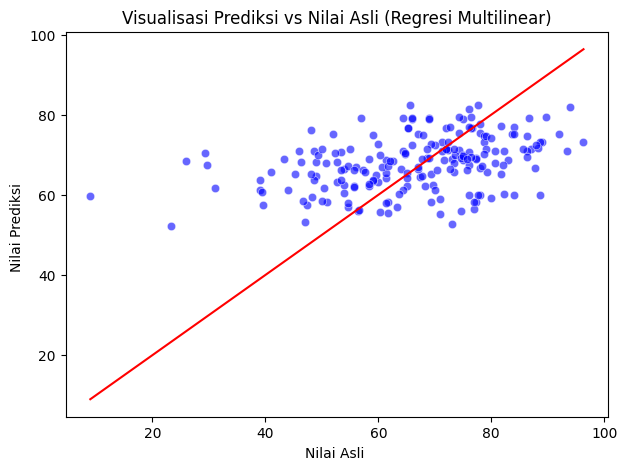

In [67]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel("Nilai Asli ")
plt.ylabel("Nilai Prediksi ")
plt.title("Visualisasi Prediksi vs Nilai Asli (Regresi Multilinear)")
plt.show()